# Data Exploration

In [29]:
import pandas as pd
import numpy as np

import pickle 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

#Import Warnings
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [3]:
# Load games data
df = pd.read_json('../Data/steam/gamesdata.json')
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN


In [4]:
# Load users/items data
useritems = pd.read_json('../Data/steam/data.json')
useritems.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


We notice that the `items` column is a list of dictionaries, with a dictionary for each game.

In [6]:
# Preview items column values for first user
# Restrict to first 2 items in dictionary

useritems['items'][0][0:2]

[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 6,
  'playtime_2weeks': 0},
 {'item_id': '20',
  'item_name': 'Team Fortress Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0}]

We will look to extract the `item_id`s into a seperate column. For now we will leave the playtime data but look to incorporate it later.

In [7]:
# Get all item_id for first user
gameids = [useritems['items'][0][index]['item_id'] for index, _ in enumerate(useritems['items'][0])]
# Show first 10 item ids
gameids[:10]

['10', '20', '30', '40', '50', '60', '70', '130', '300', '240']

In [8]:
# Create column with item ids
useritems['item_ids'] = useritems['items'].apply(lambda x: [x [index]['item_id'] for index, _ in enumerate(x)])
useritems.head()

,user_id,items_count,steam_id,user_url,items,item_ids
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 20, 30, 40, 50, 60, 70, 130, 300, 240, 38..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 80, 100, 300, 30, 40, 60, 240, 280, 360, ..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest...","[1200, 1230, 1280, 1520, 220, 320, 340, 360, 3..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 20, 30, 40, 50, 60, 70, 130, 80, 100, 300..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea...","[300, 20, 50, 70, 130, 10, 30, 40, 60, 80, 100..."


Let's count the number of unique `item_ids`.

In [9]:
# list of all ids - includes duplicates
idlist = np.concatenate(useritems['item_ids'])
# Get number of unique item_ids
uniqueids = set(idlist)
len(uniqueids)

10978

In [10]:
# Explode item_ids into seperate rows
lst_col = 'item_ids'
useritems = pd.DataFrame({col:np.repeat(useritems[col].values, useritems[lst_col].str.len())
                              for col in useritems.columns.difference([lst_col])
                        }).assign(**{lst_col:np.concatenate(useritems[lst_col].values)})[useritems.columns.tolist()]
useritems

,user_id,items_count,steam_id,user_url,items,item_ids
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",10
1,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",20
2,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",30
3,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",40
4,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",50
...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'...",346330
5153205,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'...",373330
5153206,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'...",388490
5153207,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'...",521570


In [11]:
# Change item_id to int
useritems['item_ids'] = useritems['item_ids'].map(lambda x : int(x))
# Rename column to match
useritems = useritems.rename(columns={'item_ids': 'id'})

In [12]:
# Check
useritems.head()

,user_id,items_count,steam_id,user_url,items,id
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",10
1,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",20
2,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",30
3,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",40
4,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",50


In [14]:
len(useritems)

5153209

In [13]:
# Check games df
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN


In [16]:
# Merge useritems and games data dataframes
alldata = pd.merge(useritems, df, on = 'id')
alldata.head()

,user_id,items_count,steam_id,user_url,items,id,publisher,genres,app_name,title,...,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",10,Valve,[Action],Counter-Strike,Counter-Strike,...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...",10,Valve,[Action],Counter-Strike,Counter-Strike,...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88
2,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik...",10,Valve,[Action],Counter-Strike,Counter-Strike,...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88
3,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea...",10,Valve,[Action],Counter-Strike,Counter-Strike,...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88
4,corrupted_soul,115,76561198007659920,http://steamcommunity.com/id/corrupted_soul,"[{'item_id': '4000', 'item_name': 'Garry's Mod...",10,Valve,[Action],Counter-Strike,Counter-Strike,...,2000-11-01,"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"[Multi-player, Valve Anti-Cheat enabled]",9.99,False,Valve,Overwhelmingly Positive,88


In [17]:
len(alldata)

4294257

## Exploration

### Look at top publishers

In [42]:
alldata = alldata[alldata['publisher'].notnull()]

In [43]:
# Create dictionary
game_publishers = {}
for publisher in list(alldata['publisher']):
    if not publisher in game_publishers:
        game_publishers[publisher] = 1
    else:
        game_publishers[publisher] += 1

In [44]:
# Get top 10 publishers
top10_publishers = dict(Counter(game_publishers).most_common(10))
top10_publishers

{'Valve': 356833,
 'Square Enix': 90533,
 'SEGA': 86184,
 'Electronic Arts': 85707,
 'Ubisoft': 83770,
 'Bethesda Softworks': 76053,
 'Bohemia Interactive': 62212,
 '2K Games': 61305,
 'Warner Bros. Interactive Entertainment': 57810,
 'Deep Silver': 52773}

### Explore ratings

**Question: Are top rated games most popular?**

In [18]:
df['metascore'].describe()

count     2677
unique      71
top         80
freq       125
Name: metascore, dtype: int64

In [19]:
scores = df[df['metascore'].notnull()]

In [20]:
scores['metascore'].describe()

count     2677
unique      71
top         80
freq       125
Name: metascore, dtype: int64

In [21]:
scores['metascore'].value_counts()

80    125
74    107
77    104
75    103
76    102
     ... 
95      1
33      1
34      1
42      1
20      1
Name: metascore, Length: 71, dtype: int64

TypeError: '<=' not supported between instances of 'int' and 'str'

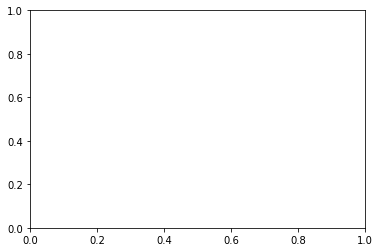

In [23]:
scores['metascore'].hist()

### Explore price

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
publisher         24083 non-null object
genres            28852 non-null object
app_name          32133 non-null object
title             30085 non-null object
url               32135 non-null object
release_date      30068 non-null object
tags              31972 non-null object
discount_price    225 non-null float64
reviews_url       32133 non-null object
specs             31465 non-null object
price             30758 non-null object
early_access      32135 non-null bool
id                32133 non-null float64
developer         28836 non-null object
sentiment         24953 non-null object
metascore         2677 non-null object
dtypes: bool(1), float64(2), object(13)
memory usage: 3.7+ MB


In [25]:
dfprice = df[df['price'].notnull()]

In [26]:
dfprice = dfprice.replace('Free To Play', 0)

In [27]:
dfprice['price'].describe()

count     30758.00
unique      162.00
top           4.99
freq       4278.00
Name: price, dtype: float64

TypeError: '<=' not supported between instances of 'int' and 'str'

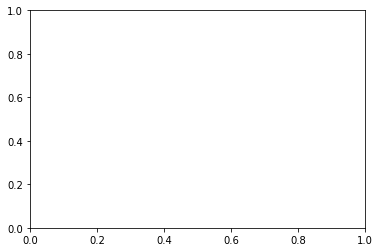

In [28]:
dfprice['price'].hist()